# Курсовая работа на тему
## Случайные блуждания и метод Монте-Карло
__Выполнил студент:__ Шведков Павел Николаевич  
__Научный руководитель:__ Радыно Евгений Мефодьевич
### Задачи:
- вычислить с какой вероятностью какое значение получится по прошествии n единиц времени, замерять различные вероятности методом Монте-Карло (вероятность всё время оставаться в плюсе, вероятность достигнуть определённого уровня и т.д.)
- закон арксинуса для случайного блуждания
- закон повторного логарифма для случайного блуждания

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import itertools

In [2]:
def plot_walk(coords):
    for i in range(0,len(coords),2):
        plt.plot(coords[i],coords[i+1])
    pass

In [3]:
#Построение одномерного блуждания с заданной вероятностью 
#
#Функция возвращающая двумерный массив координат одномерного
#блуждания, где
#p — шанс шага "вправо"
#iterations           — число шагов симуляции

def random_walks(iterations,p):
    iterations+=1
    steps= np.zeros(iterations)
    
    for i in range(1,iterations):
        steps[i]=steps[i-1]+random.choices([-1, 1],weights=[1-p, p])
    return (np.array(range(0,iterations)), np.array(steps))

In [4]:
#Инициализация блуждания
n=15
p=.5
m=1
coords=np.zeros((m*2,n+1))

for i in range(0,m*2,2):
    coords[i]=random_walks(n,p)[0]
    coords[i+1]=random_walks(n,p)[1]

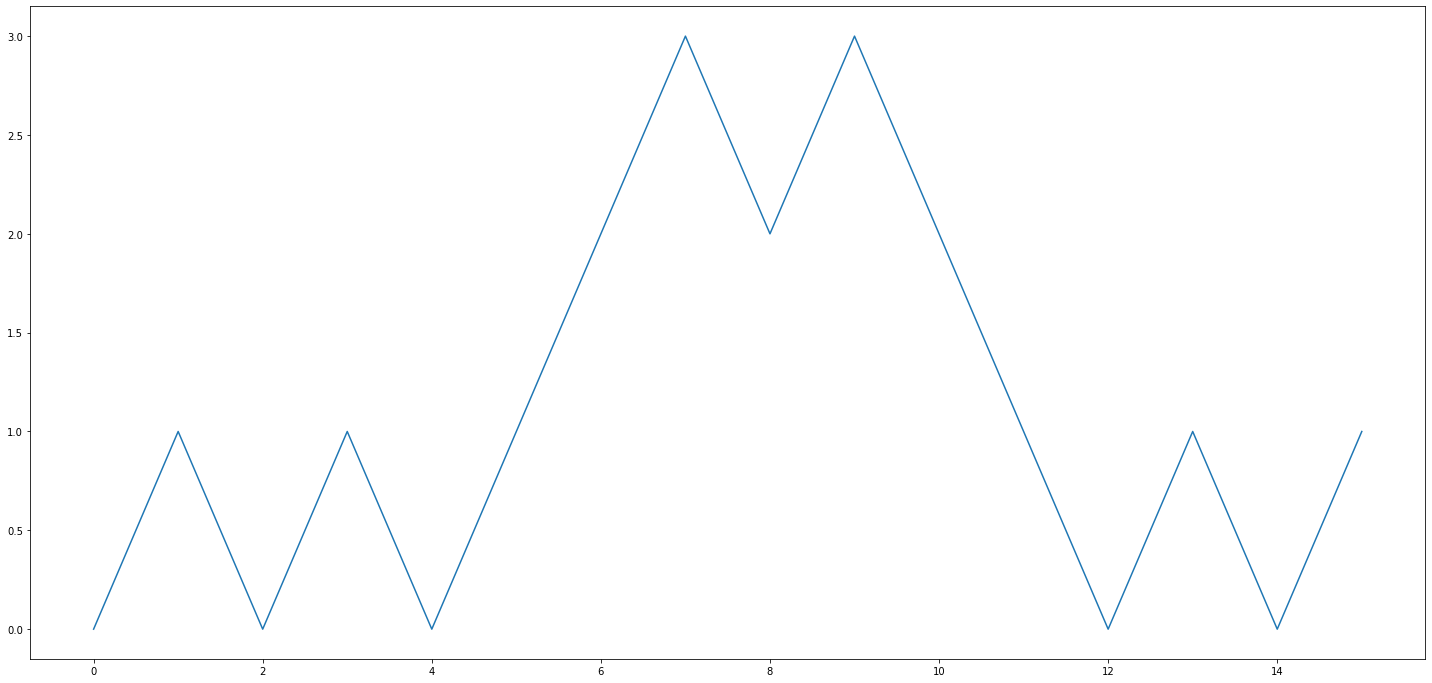

In [5]:
#Отображение блуждания
plt.figure(figsize=(25,12))
plot_walk(coords)


In [6]:
#Генерация трецгольника Паскаля на заданном уровне
#
#Функция принимает целое число floor и возвращает массив
#значений для треугольника Паскаля на уровне floor

def C(n,k):
    n+=1
    return len(list(itertools.combinations(range(1, n), k)))


def paskals_triangle(floor):
    result=np.zeros(floor+1)
    
    for i in range(floor+1):
        result[i]=C(floor,i)
    return np.array(result)

In [7]:
#Вероятности для различных значений блуждания из n шагов
#
#Функция принимает количество шагов блуждания n, а возвращает
#массив значений вероятности достижения различных значений при
#n шагах блуждания

def probability_of_outcome(n):
    result=paskals_triangle(n)
    all_possible_outcomes=2**n
    
    for i in range(n+1):
        result[i]=result[i]/all_possible_outcomes

    return np.array(result)

In [8]:
#Вычисление возможных значения блуждания на n-м шаге
#
#Функция принимает n — шаг блуждания, а возвращает массив
#возможных значений блуждания на шаге n

def outcomes(n):
    result=np.zeros(n+1)
    is_even=0 
    if n%2==1:
        is_even=1
    result[0]=n
    result[n]=-n
    for i in range(1,int(n/2+1)):
        result[i]=result[i-1]-2
        result[n-i]=-(result[i-1]-2)
    return np.array(result)

In [9]:
#Таким образом, получаем закон распределения для n-го шага блуждания
#для подтверждения(доказательства) этого закона воспользуемся методом

n=5
probabilities=probability_of_outcome(n)
value=outcomes(n)

value=[list(value),list(np.zeros(np.size(value)))]
value[1]=list(probabilities)
print(value)

[[5.0, 3.0, 1.0, -1.0, -3.0, -5.0], [0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]]


In [10]:
#Сбор данных об окончании n шагов в точках, соответствующих значениям outcomes
#для m испытаний
#
#n-количество шагов в одном блуждании
#m-число "прогонов"
#p-вероятность "положительного" шага"

n=5
m=100000
p=0.5

possible_outcomes=np.zeros(m)
result=[np.array(outcomes(n)),np.array(np.zeros(n+1))]
out=outcomes(n)

for i in range(m):
    possible_outcomes[i]=random_walks(n+1,p)[1][n]
    result[1][list(out).index(possible_outcomes[i])]+=1
print(result)


[array([ 5.,  3.,  1., -1., -3., -5.]), array([ 3221., 15650., 31248., 31426., 15406.,  3049.])]


In [11]:
#Получение распределения по методу  

chance_monte=np.zeros(n+1)
for i in range(n+1):
    chance_monte[i]=result[1][i]/m
print("Оценка вероятности по методу Монте-Карло:")
print(chance_monte)
print("Распределение вероятности, выведенное теоретически:")
print(probability_of_outcome(n))

Оценка вероятности по методу Монте-Карло:
[0.03221 0.1565  0.31248 0.31426 0.15406 0.03049]
Распределение вероятности, выведенное теоретически:
[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]


Из предыдущего опыта получаем ответ на вопрос: с какой вероятностью будет достигнут определённый уровень.
Определим теперь вероятность оставаться "в плюсе" и уйти "в минус" 

In [12]:
#Задание параметров симуляции
#
#n-количество шагов в одном блуждании
#m-число "прогонов"
#p-вероятность "положительного" шага"

m=1000
n=100
p=0.5

In [13]:
#Сбор данных о сохранении "положительного счёта" для n шагов с вероятностью p
#в m испытаниях

staying_in_uper_halfplane=0

for i in range(m):
    current_step=random_walks(n+1,p)
    if len(current_step[1][current_step[1]<0])==0:
        staying_in_uper_halfplane+=1
       
print(staying_in_uper_halfplane)

67


In [14]:
#Сбор данных о сохранении "отрицательного счёта" для n шагов с вероятностью p
#в m испытаниях

staying_in_lower_halfplane=0

for i in range(m):
    current_step=random_walks(n+1,p)
    if len(current_step[1][current_step[1]>0])==0:
        staying_in_lower_halfplane+=1
        
print(staying_in_lower_halfplane)

88


In [15]:
#Вычисление вероятности оставаться в положительной полуплоскости и в отрицательной

uper_plane_probability=staying_in_uper_halfplane/m
lower_plane_probability=staying_in_lower_halfplane/m

print("Вероятность оставаться в верхней полуплоскости:")
print(uper_plane_probability)
print("Вероятность оставаться в нижней полуплоскости:")
print(lower_plane_probability)

Вероятность оставаться в верхней полуплоскости:
0.067
Вероятность оставаться в нижней полуплоскости:
0.088


Рассмотрим теперь закон арксинуса. Закон арксинуса утверждает (если сильно упростить), что при честной игре, например, в монетку вероятность игрока победить или же проиграть значительно выше, нежели сыграть вничью.
Своё название закон получил из-за вида функции распределения.
Попробуем получить подтверждение этого закона распределения для блуждания по прямой методом Монте-Карло, то есть проверим, действиительно ли вероятности отношения времени "в плюсе" к общему времени соответствует закону плотности распределения арксинуса

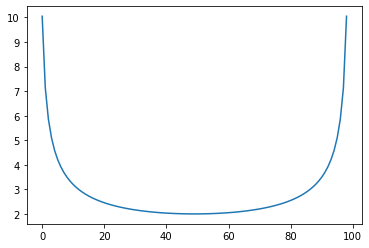

In [16]:
#график плотности распределения закона арксинуса

k=100
a=[0]

for i in range(1,k):
    a.append(a[i-1]+1/k)

a.remove(0)
a=np.array(a)

plt.plot(1/np.sqrt(a*(1-a)))

In [27]:
#Расчитаем отношение времени проведённого в положительной полусплоскости к общему времени блуждания
#
#m — число итераций метода Монте-Карло
#n — число шагов в блуждании

import time
start_time = time.time()

m=20000
n=100
p=0.5
 
origin_data = np.zeros(m)
dataTest=np.zeros(m)

for i in range(1,m):
    walk=random_walks(n,p)
    time_ratio=((walk[1]>=0).sum())/(n-1)
    origin_data[i]=time_ratio
#print(np.sort(origin_data))
print("--- %s seconds ---" % (time.time() - start_time))

--- 19.695617198944092 seconds ---


In [25]:
#построение разбиения для отображения гистограммы
#
#splitting — число интервалов в разбиении

splitting=100

intervals=np.zeros(splitting+1)

for i in range(1,splitting+1):
    intervals[i]+=intervals[i-1]+1/(splitting)

result, _ = np.histogram(origin_data, bins=splitting+1)
result = result / len(origin_data) 

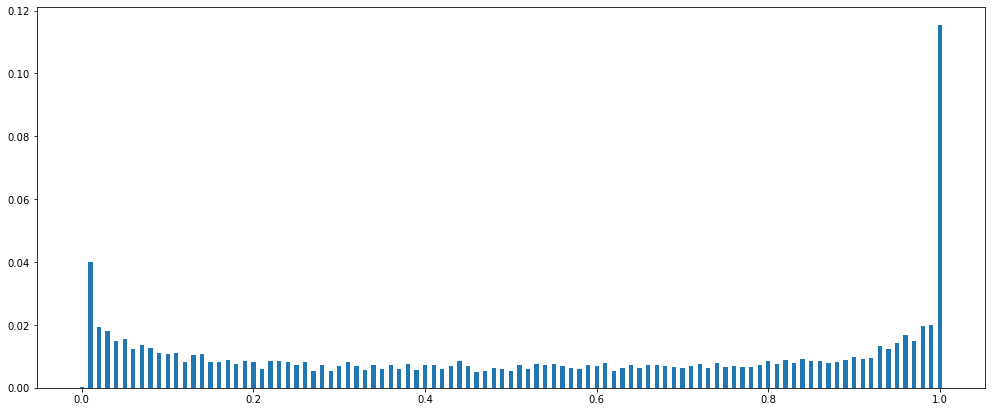

In [26]:
#отображение гистограммы плотности распределения арксинуса для случайного блуждания

x =intervals[0:splitting+1]
y = result

fig, ax = plt.subplots()

ax.bar(x, y,width=0.005)

ax.set_facecolor('white')
fig.set_facecolor('white')
fig.set_figwidth(17)    #  ширина Figure
fig.set_figheight(7)    #  высота Figure

plt.show()


Закон повторного логарифма показывает, что при достаточно больших n, случнайное блуждание, если и не сходится к нулю, то, по крайней мере, ограничено некоторой постоянной.

Убедимся в этом моделированием по методу Монте-Карло. 

In [367]:
#Строим последовательность из крайних значений блуждания делённых на текущую длину блуждания. Также создаём асимптоту.
#
#n — число шагов блуждания 
#m — число итераций метода
#p — вероятность положительного шага

start_time=time.time() 

n=100
m=6000
p=0.5

boundaries=np.array(range(3,m))
boundaries=np.sqrt((2*np.log(np.log(boundaries)))/boundaries)

outcomes=[0]

for i in range(1,m):
    outcomes.append(( random_walks(i,p)[1][i-1]/i))


print("--- %s seconds ---" % (time.time() - start_time))

--- 122.20081043243408 seconds ---


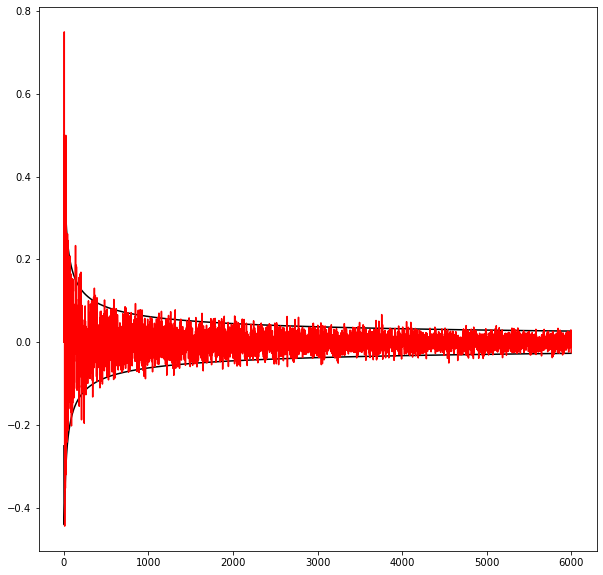

In [368]:
#отображение закона повторного логарифма

fig=plt.figure(figsize=(10,10))

plt.plot(boundaries,color="black")
plt.plot(-boundaries,color="black")
plt.plot(outcomes,color="red")